In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
p = np.array([0.0, 0.1, 0.1, 0.3, 0.5, 0.7, 0.9])
n = np.zeros(p.shape)
np.random.shuffle(p)
p

array([0. , 0.7, 0.3, 0.9, 0.1, 0.5, 0.1])

In [39]:
class e_greedy:
    def __init__(self, p, T, e, able=False) -> None:
        self.p = p.copy()
        self.e = e
        self.T = T
        self.able = able
        self.c = 1
        self.Exp = np.zeros(p.shape)

    def gete(self, t):
        # 动态改变e值(如果需要的话)
        if not self.able:
            return self.e
        maxp = np.max(self.Exp)
        if np.where(self.Exp != maxp)[0].size == 0:
            return 1
        else:
            p = maxp-np.max(self.Exp[np.where(self.Exp != maxp)])
            return min(1, self.c*self.p.size)/(t*p)

    def NextAct(self, e):
        # 获取下一个动作
        MaxA = np.max(self.Exp)
        if e < np.random.rand():
            return np.random.choice(np.where(self.Exp == MaxA)[0])
        else:
            return np.random.choice(range(self.Exp.size))

    def Reward(self, act):
        # 随机出该动作的回报
        if self.p[act] > np.random.rand():
            return 1.0
        else:
            return 0.0

    def update(self):
        # 迭代过程
        dQ = []
        Q = 0
        n = np.zeros(self.p.shape)
        tmpT = self.T
        while tmpT > 0:
            tmpT -= 1
            act = self.NextAct(self.gete(self.T-tmpT))
            Q -= self.p[act]-np.max(self.p)
            dQ.append(Q)
            r = self.Reward(act)
            n[act] += 1
            self.Exp[act] += (r-self.Exp[act])/n[act]
        return dQ

In [40]:
lines = [e_greedy(p, 2000, i, False) for i in np.linspace(0.1, 0.3, 3)]
qs = []
for i in lines:
    qs.append(np.around(i.update(), 5))
    print(np.around(i.Exp, 5))
    print(np.around(i.p, 5))

[0.      0.65714 0.3871  0.89012 0.11538 0.44444 0.03448]
[0.  0.7 0.3 0.9 0.1 0.5 0.1]
[0.      0.7541  0.35417 0.89969 0.20635 0.48611 0.19355]
[0.  0.7 0.3 0.9 0.1 0.5 0.1]
[0.      0.68235 0.32558 0.87653 0.08046 0.48936 0.09302]
[0.  0.7 0.3 0.9 0.1 0.5 0.1]


In [41]:
dlines = e_greedy(p, 2000, 0.1, True).update()
dlines[-1]

38.29999999999998

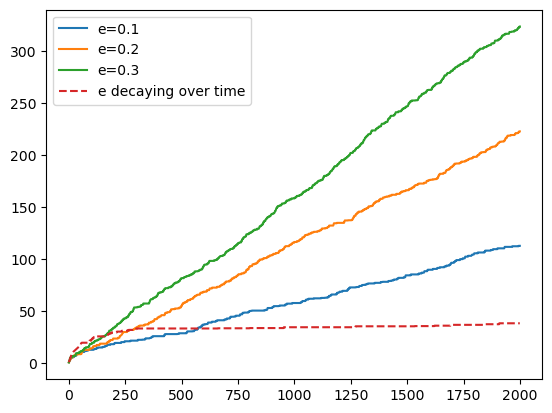

In [42]:
plt.plot(qs[0])
plt.plot(qs[1])
plt.plot(qs[2])
plt.plot(dlines, ls='--')
plt.legend(["e=0.1", "e=0.2", "e=0.3", "e decaying over time"])